# Just using the code to create visuals

## Notebook analysis: Table of Contents
#### This noteboook is a conitnuation from the "Creating represetnative brain", and only includes the portion of the code necessary for visualizing POI information. See other notebook for full features of representative brain generation and visualization

**_________________________________________________________________________________________________________________________**

# Setup:
1. Import all needed python libraries
2. input file storage information
3. Decide on color coding for group values 

### 1. Import Libraries

In [1]:
#Import all needed libraries 

#Libraries to read and format data
import numpy as np
import pandas as pd
import open3d as o3d

#libraries for genreating figures
%matplotlib ipympl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
from pandas.api.types import CategoricalDtype 
from collections import Counter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

#Libraries for clustering analysis 
from sklearn.cluster import DBSCAN #import density clustering calculations
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import NearestNeighbors 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans #kmean clustering analysis

#Libraries for creating tables
from tabulate import tabulate 
from prettytable import PrettyTable 

#Libraries to compare data and run stats
import seaborn as sns #visualizing statistics
from itertools import combinations #Calculating groups combinations at later steps
import scipy 
from scipy.stats import chisquare

#deactivate warning signs that can spam code later in section due to changes in code updates
import warnings
warnings.filterwarnings("ignore")

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


### 2. Set path for project file folder and choose data analysis file

**This stage will autofill all save file information, and should be customized for each project and analysis run**

* To find the file path, go into folder library, right click on file, and "copy as path". Paste this path informaation into the correct variables as described 
* Troubleshoot note: to use the "/" not "\", which is interpretted as an error


In [2]:
#DEFINE PATH of project folder
my_path = ("C:/Users/Mullo/Documents")

#Input: files for generating representative brain clusters
my_analysis_file = ("/M_chat_all_python.csv")
my_analysis_file_nocsv = "/M_chat_all_python"
#Input: files for analyzing labelled points of interest (POI)
my_analysis_file_POI = "/M_chatfos_ByTreatment.csv"
my_analysis_file_POI_nocsv = "/M_chatfos_ByTreatment"

#DEFINED project subfolders
output = "/output"
raw_data= "/Raw Data"
output_figures= "/output/Figures"
output_tables= "/output/Tables"
output_datafiles= "/output/DataFiles"

#Setup standard variables for all saved files 
date = pd.to_datetime('now').strftime("%Y-%m-%d")
file_date_name= '({name})'.format(name=date)

#Table with all variables saved 
TableTitle= "Table: Reference table for file input names and paths"
print(TableTitle)
Table_filenames = PrettyTable(["File Description", "File variable name", "File Path"])
Table_filenames.add_row(['File Path on Computer','my_path',my_path])
Table_filenames.add_row(['Input files: rep brain, ', 'my_analysis_file', my_analysis_file])
Table_filenames.add_row(['Input files: points of interest', 'my_analysis_file', my_analysis_file_POI])
Table_filenames.add_row(['Output file for results','output', output])
Table_filenames.add_row(['Subfolder- figure results','output_figures', output_figures])
Table_filenames.add_row(['Subfolder- tables results','output_tables', output_tables])
Table_filenames.add_row(['Subfolder- datafiles results','output_datafiles', output_datafiles])
Table_filenames.add_row(['listed date', 'date', date])
Table_filenames.add_row(['Timestamp for saved file', 'file_date_name', file_date_name])
print(Table_filenames)


Table: Reference table for file input names and paths
+---------------------------------+--------------------+----------------------------+
|         File Description        | File variable name |         File Path          |
+---------------------------------+--------------------+----------------------------+
|      File Path on Computer      |      my_path       |  C:/Users/Mullo/Documents  |
|     Input files: rep brain,     |  my_analysis_file  |   /M_chat_all_python.csv   |
| Input files: points of interest |  my_analysis_file  | /M_chatfos_ByTreatment.csv |
|     Output file for results     |       output       |          /output           |
|    Subfolder- figure results    |   output_figures   |      /output/Figures       |
|    Subfolder- tables results    |   output_tables    |       /output/Tables       |
|   Subfolder- datafiles results  |  output_datafiles  |     /output/DataFiles      |
|           listed date           |        date        |         2023-12-27         |


### Load the new analysis file of the labelled cells of interest [ **points of interest (POI)**] from a csv file <br>

In [3]:
#Import files to pandas dataframe from local computer path
analysis_file= '/f_rVTA_predictmodel_xyz.csv'
data_POI= pd.read_csv(my_path + raw_data + analysis_file)

#confirm that the excel sheet is correctly imported, the first few rows of the .csv file will be shown
print("File input:", analysis_file)
data_POI.head(5)


File input: /f_rVTA_predictmodel_xyz.csv


,centroid ID,ap,ml,dv,npoints/cluster,n groups
0,698,-5.07500,-1.085000,4.330000,2,1
1,383,-5.05800,-1.006000,4.472000,3,1
2,113,-5.05091,-0.951820,4.192727,1,1
3,662,-5.40000,0.723333,4.566667,2,1
4,367,-5.40000,0.838000,4.308000,2,1


In [4]:
#Import files to pandas dataframe from local computer path
model_file= '/f_chat_all_python_ KmeansCentroids_(2023-12-05).csv'
data_model= pd.read_csv(my_path + output_datafiles + model_file)

data_model.head(5)

,cluster ID,ap,dv,ml
0,0,-4.697143,3.674286,0.547143
1,1,-4.747500,4.162500,-0.920000
2,2,-4.343077,4.144615,1.301538
3,3,-4.620000,4.115833,-1.427500
4,4,-4.764000,4.399000,0.872000


### 3. Set up color code for visualzing treatment groups

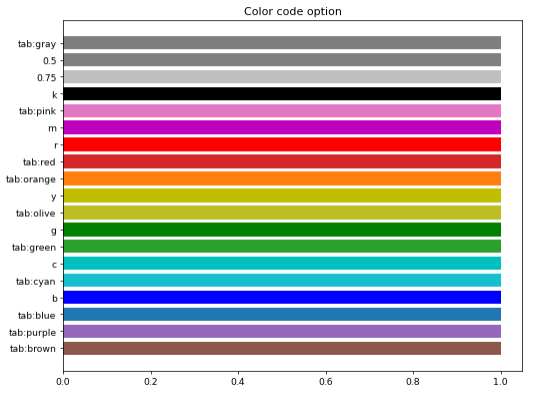

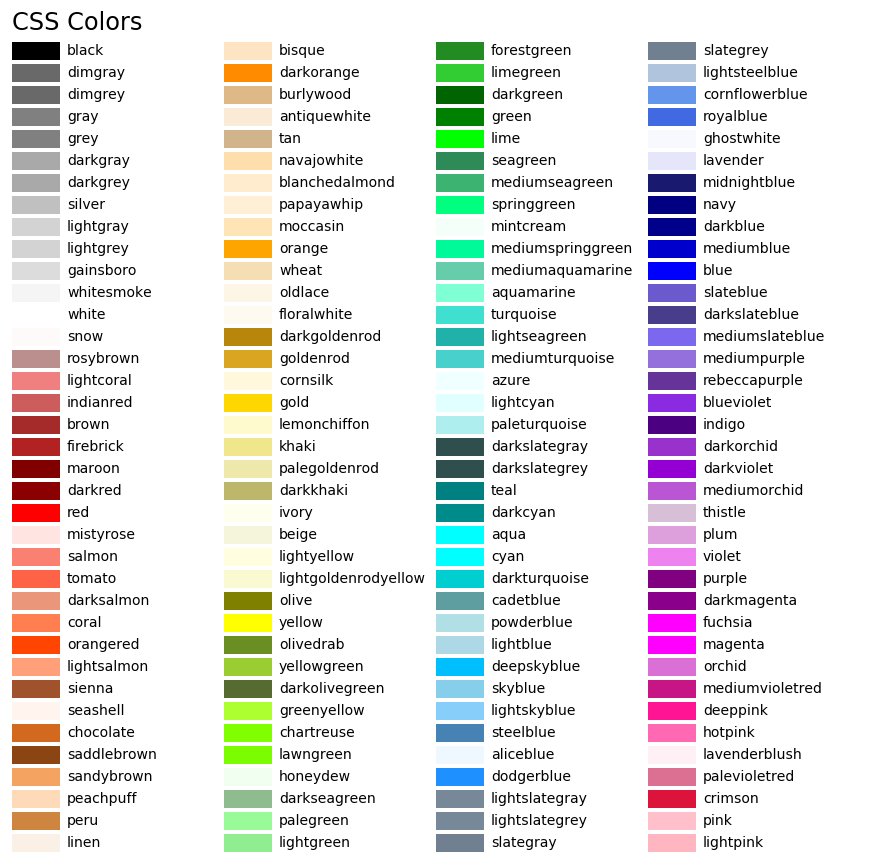

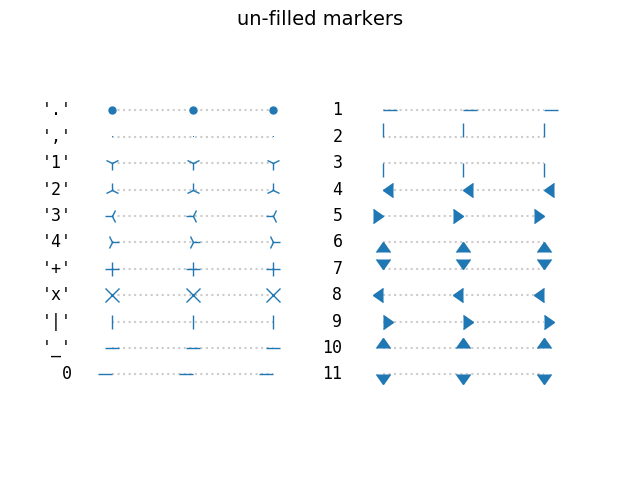

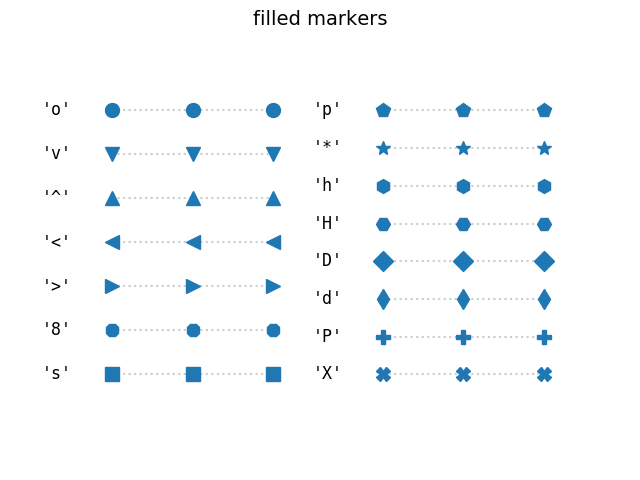

**_________________________________________________________________________________________________________________________**

# Part 2: Visualize location of labelled points of interest (POI) across brain region 
Ex: Use cluster ID to recognize location and grouping of activated neurons (Fos+) by treatment group (etoh injection dose or timepoint)

## Visualize: all POI datapoints in the 3D space by treatment group

**TO DO** fix figure legend to be treatment names and colors

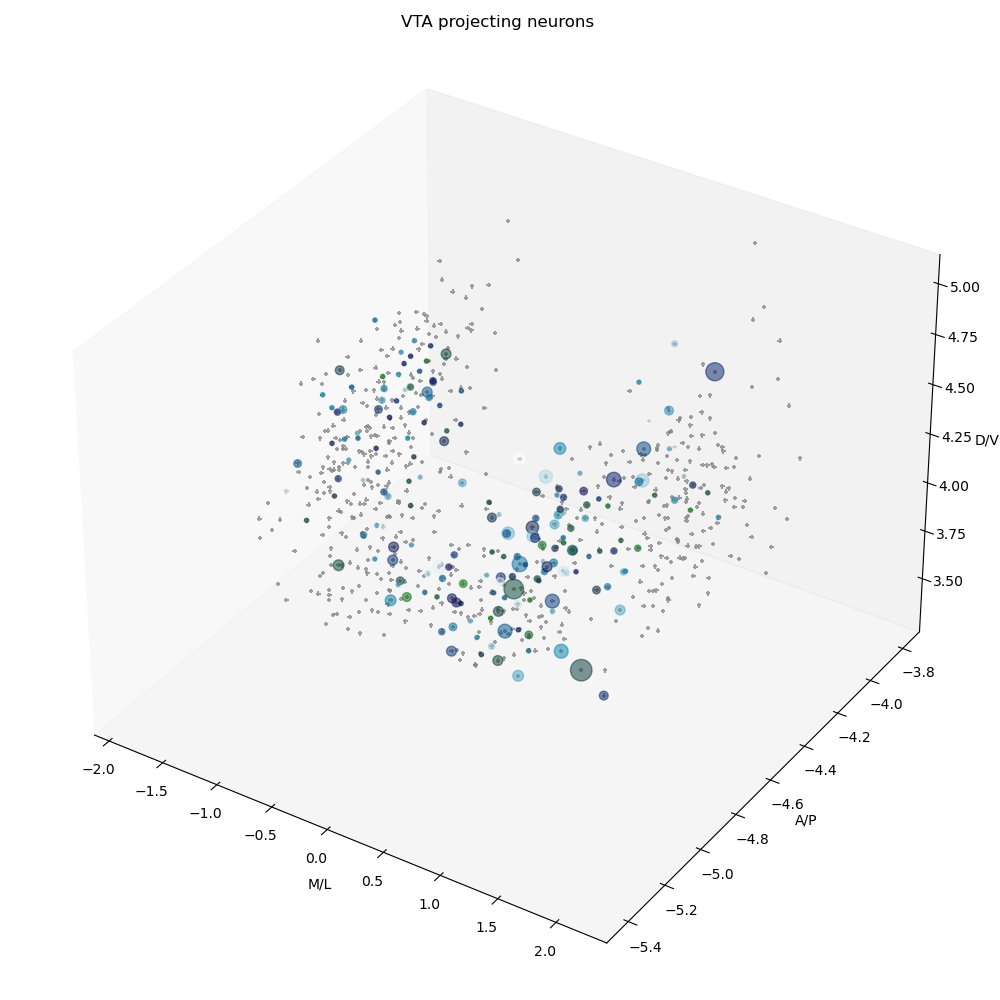

Figure saved: VTA projecting neurons 
Saved File Timestamp: (2023-12-27)
Location of saved file: C:/Users/Mullo/Documents/output/Figures


In [5]:
FigureTitle = "VTA projecting neurons "
FigureDetail= '3D chat to VTA clusters'
#Generate the 3D plot outline and plot size

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
fig_TreatColor = plt.figure()
ax_tc = fig_TreatColor.add_subplot(projection="3d")

#Define each axis value and plot based on groups
x_tc = data_POI["ml"].tolist() 
y_tc = data_POI["ap"].tolist() 
z_tc = data_POI["dv"].tolist() 
x_model = data_model["ml"].tolist() 
y_model = data_model["ap"].tolist() 
z_model = data_model["dv"].tolist() 
#set figure axis to correct variable name 
ax_tc.set_xlabel('M/L')
ax_tc.set_ylabel('A/P')
ax_tc.set_zlabel('D/V')
plt.title(FigureTitle)

#First, plot centroids of the representative brain model 
model_marker= '+'
model_color= '0.5'
m_marker_size= 10
model_alpha= 0.75

ax_tc.scatter(x_model, y_model, z_model, marker= model_marker, c=model_color, s=m_marker_size, alpha=model_alpha)

datapoint_marker= 'o'
size_value= data_POI["npoints/cluster"].tolist() 
color_value=  data_POI["centroid ID"].tolist() 
cmap_value= 'ocean'
datapoint_alpha= 0.5
size_adjust= 10
size_withscale= []
for popcorn in range (0, len(x_tc)):
    new_point= size_value[popcorn] * size_adjust
    size_withscale.append(new_point)

ax_tc.scatter(x_tc, y_tc, z_tc, marker=datapoint_marker, s=size_withscale,  c=color_value, cmap= cmap_value, alpha=datapoint_alpha)

#making background transparent 
# make the panes transparent
#ax_tc.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax_tc.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax_tc.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax_tc.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax_tc.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax_tc.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

ax_tc.view_init(elev=34, azim=-57, roll=0)
plt.show()

#________________________________________________________________
#Save Figure File to path folder
print("Figure saved:", FigureTitle)
print("Saved File Timestamp:", file_date_name)

save_results_to = my_path + output_figures
print("Location of saved file:", save_results_to)
plt.savefig(save_results_to +  FigureTitle + FigureDetail+ file_date_name + '.png', dpi = 600)
plt.savefig(save_results_to + FigureTitle + FigureDetail+ file_date_name + '.pdf', dpi = 600)


## Visualize: Crossection 2D of all POI datapoints by treatment

#### set all variables used for 2D cross section figures

In [6]:
#Set parameters for ALL 2D cross section figures

#Define anterior-posterior range and splitting (POI)
ap_POIlisted= data_POI.sort_values(by=['ap'])['ap'].unique()
ap_POImin= min(ap_POIlisted)
ap_POImax= max (ap_POIlisted)
ap_POIrange= abs(ap_POImax-ap_POImin)
#axis based on POI dataset
ml_POI= data_POI["ml"].tolist()
ap_POI= data_POI["ap"].tolist()
dv_POI= data_POI["dv"].tolist()
min_POIx= round(min(ml_POI))
max_POIx= round(max(ml_POI))
min_POIy= round(min(dv_POI))
max_POIy= round(max(dv_POI))

#Define anterior-posterior range and splitting (rep brain)
ap_kmlisted= data_model.sort_values(by=['ap'])['ap'].unique()
ap_kmmin= min(ap_kmlisted)
ap_kmmax= max (ap_kmlisted)
ap_kmrange= abs(ap_kmmax-ap_kmmin)
#axis based on rep brain model 
km_ml= data_model['ml'].tolist()
km_ap= data_model['ap'].tolist()
km_dv= data_model['dv'].tolist()
min_kmx= round(min(km_ml))
max_kmx= round(max(km_ml))
min_kmy= (min(km_dv))
max_kmy= (max(km_dv))

#min and max of all values 
mina_ml= min(ml_POI + km_ml)
maxa_ml= round(max(ml_POI + km_ml))
mina_dv=min((dv_POI) + (km_dv))
maxa_dv=round(max(dv_POI + km_dv))
mina_ap=min(ap_POI + km_ap)
maxa_ap=round(max(ap_POI + km_ap))

#input manual crosssection 
xsection_set=[-5.09, -4.78, -4.46, -4.15, -3.84]

#create reference to cross sections
sct1= [xsection_set[0], xsection_set[1]]
sct2= [xsection_set[1], xsection_set[2]]
sct3= [xsection_set[2], xsection_set[3]]
sct4=[xsection_set[3], xsection_set[4]]

TableTitle= 'Table: Cross section ap coordinates (chon atlas)'
print(TableTitle)
table_xsection= PrettyTable(['cross section #', 'posterior ap', 'anterior ap'])
table_xsection.add_row(['1', sct1[0], sct1[1]])
table_xsection.add_row(['2', sct2[0], sct2[1]])
table_xsection.add_row(['3', sct3[0], sct3[1]])
table_xsection.add_row(['4', sct4[0], sct4[1]])
print(table_xsection)

#______________________________________________
#updates: sections to be manually entred as an option instead of evenly distributed
#maybe add an input option for this stage as well to help with customization

Table: Cross section ap coordinates (chon atlas)
+-----------------+--------------+-------------+
| cross section # | posterior ap | anterior ap |
+-----------------+--------------+-------------+
|        1        |    -5.09     |    -4.78    |
|        2        |    -4.78     |    -4.46    |
|        3        |    -4.46     |    -4.15    |
|        4        |    -4.15     |    -3.84    |
+-----------------+--------------+-------------+


### All POI: Create cross section figure

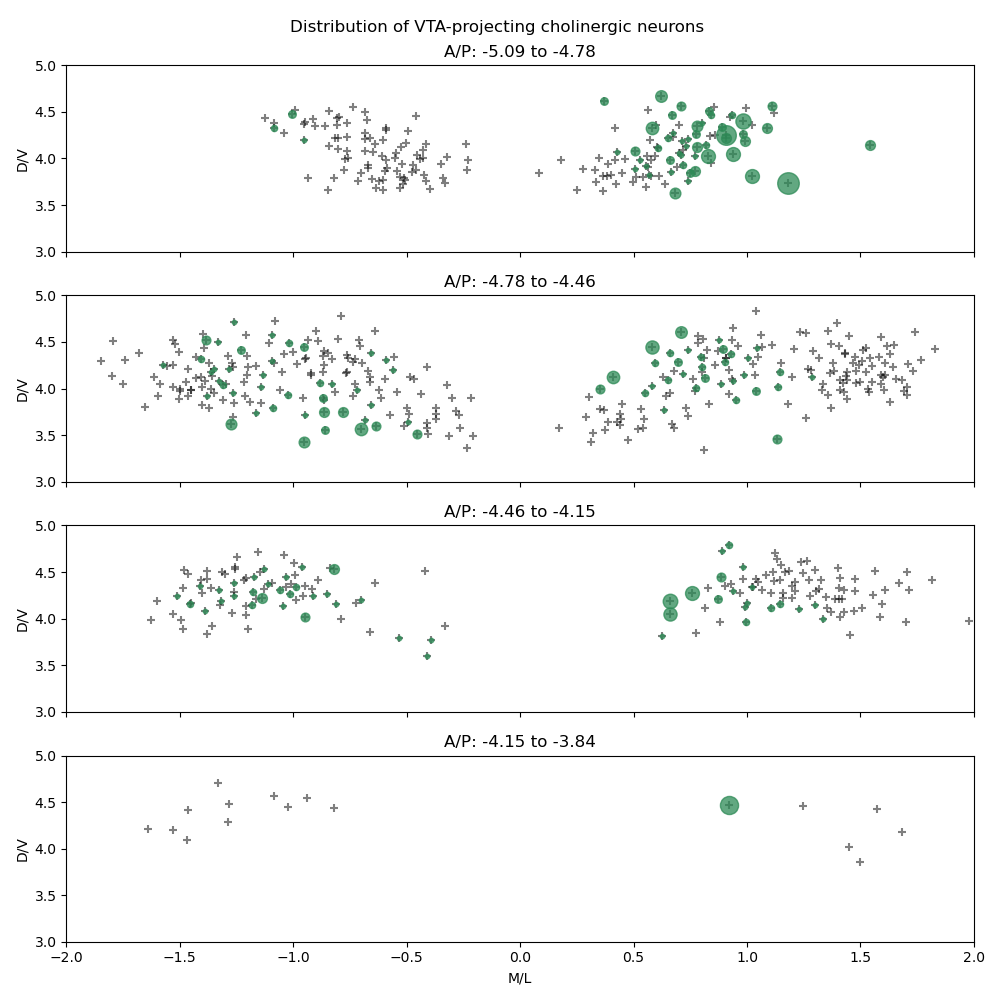

Location of saved file: C:/Users/Mullo/Documents/output/Figures
file saved Distribution of VTA-projecting cholinergic neurons 


In [7]:
#create figure- specifics
FigureTitle= 'Distribution of VTA-projecting cholinergic neurons '
FigureDetail= 'xsection of male VTA projections'
fig_2D_allPOI, ax_2DPOI= plt.subplots(4,1, sharey='all', sharex='col')
fig_2D_allPOI.suptitle(FigureTitle)

#Create the refernece sections to be added in cross section 
#NOTE: will need to be manually update if want more than 4 crossesctions
#TODO: update this variable to be auto generated based on experimenter input on number of cross sections 

sct1A=ax_2DPOI[0]
sct1A.set_xlim(-2, 2)
sct1A.set_ylim(3, 5)
sct1A.set_ylabel('D/V')
sct1A.set_title(f"A/P: {sct1[0]} to {sct1[1]}")
sct2A= ax_2DPOI[1]
sct2A.set_title(f"A/P: {sct2[0]} to {sct2[1]}")
sct2A.set_ylabel('D/V')
sct3A= ax_2DPOI[2]
sct3A.set_ylabel('D/V')
sct3A.set_title(f"A/P: {sct3[0]} to {sct3[1]}")
sct4A= ax_2DPOI[3]
sct4A.set_title(f"A/P: {sct4[0]} to {sct4[1]}")
sct4A.set_ylabel('D/V')
sct4A.set_xlabel('M/L')

#Input dataset to plot 

#FIRST: plot location of representative brain centroids for refernece 
color_input_2='k'
alpha_input_2= 0.5
marker_input_2='+'
for tehee in range (0, len(data_model)):
    plot_ref_section= km_ap[tehee]
    x_ml= km_ml[tehee]
    y_dv= km_dv[tehee]
    for yaha in range (0, len(ap_kmlisted)):
        ref_section= ap_kmlisted[yaha]
        if plot_ref_section == ref_section:
            if (plot_ref_section>= sct1[0]) and (plot_ref_section<= sct1[1]):
                sct1A.scatter(x_ml, y_dv, c=color_input_2, alpha= alpha_input_2, marker=marker_input_2)
            elif (plot_ref_section>= sct2[0]) and (plot_ref_section<= sct2[1]):
                sct2A.scatter(x_ml, y_dv, c=color_input_2, alpha= alpha_input_2, marker=marker_input_2)
            elif (plot_ref_section>= sct3[0]) and (plot_ref_section<= sct3[1]):
                sct3A.scatter(x_ml, y_dv, c=color_input_2, alpha= alpha_input_2, marker=marker_input_2)
            elif (plot_ref_section>= sct4[0]) and (plot_ref_section<= sct4[1]):
                sct4A.scatter(x_ml, y_dv, c=color_input_2, alpha= alpha_input_2, marker=marker_input_2)
        else:
            pass

size_withscale
color_set= 'seagreen'
alpha_input_3= 0.75
marker_input_3='o'

for wohelo in range (0, len(ap_POI)):
    plot_ref_section= ap_POI[wohelo]
    x_ml= ml_POI[wohelo]
    y_dv= dv_POI[wohelo]
    size_forplot= size_withscale[wohelo]
    for foray in range (0, len(ap_POIlisted)):
        ref_section= ap_POIlisted[foray]
        if plot_ref_section == ref_section:
            if (plot_ref_section>= sct1[0]) and (plot_ref_section<= sct1[1]):
                sct1A.scatter(x_ml, y_dv, c=color_set, s=size_forplot, alpha= alpha_input_3, marker=marker_input_3)
            elif (plot_ref_section>= sct2[0]) and (plot_ref_section<= sct2[1]):
                sct2A.scatter(x_ml, y_dv, c=color_set, s=size_forplot, alpha= alpha_input_3, marker=marker_input_3)
            elif (plot_ref_section>= sct3[0]) and (plot_ref_section<= sct3[1]):
                sct3A.scatter(x_ml, y_dv, c=color_set, s=size_forplot, alpha= alpha_input_3, marker=marker_input_3)
            elif (plot_ref_section>= sct4[0]) and (plot_ref_section<= sct4[1]):
                sct4A.scatter(x_ml, y_dv, c=color_set, s=size_forplot,  alpha= alpha_input_3, marker=marker_input_3)
        else:
            pass        
#TODO: figure out legend
plt.show()

##_____________________________________________________________________________________
#Save Figure File to path folder
save_results_to = my_path + output_figures
print("Location of saved file:", save_results_to)
print("file saved", FigureTitle)
plt.savefig(save_results_to + "_ Figure_" + FigureDetail + file_date_name + '.pdf', dpi = 600)
plt.savefig(save_results_to + "_ Figure_" + FigureDetail + file_date_name + '.png', dpi = 600)


### All POI: Create histogram of ml and dv spread by treatment for each cross section

#### calculate subplot cross section for each datapoint and update dataframes with section ID and L/R hemisphere side for easier future plotting

In [8]:
#Create dataframes to idenitfy which subplot each datapoint belongs, to help filtering for figure plotting 
#Two datasets to split- one for the representative brain, and one for the POI dataframe

#dataframe: rep bain 
subplot_kmsct=[]
for hip in range (0, len(data_model)):
    ref_ap= round(km_ap[hip], 3)
    if (ref_ap>=sct1[0]) and (ref_ap<= sct1[1]):
        subplot_kmsct.append(1)
    elif (ref_ap>= sct2[0]) and (ref_ap<= sct2[1]):
        subplot_kmsct.append(2)
    elif (ref_ap>= sct3[0]) and (ref_ap<= sct3[1]):
        subplot_kmsct.append(3)
    elif (ref_ap>= sct4[0]) and (ref_ap<= sct4[1]):
        subplot_kmsct.append(4)
    else:
        subplot_kmsct.append(0)
data_model['xsct ID']= subplot_kmsct


#repeat for L or R hemisphere values 
subplot_kmhemi=[]
for frog in range (0, len(data_model)):
    ref_ml= km_ml[frog]
    if ref_ml >= 0:
        subplot_kmhemi.append('R')
    elif ref_ml <=0:
        subplot_kmhemi.append('L')
    else:
        subplot_kmhemi.append('x')
data_model['hemisphere']=subplot_kmhemi
print("updated dataframe: neuronal space of representative brain")
print(data_model)
print("")
#Put in code to save this dataframe as csv file 
        
#datafram: POI
subplot_POIsct=[]
for hop in range (0, len(data_POI)):
    ref_ap2= round(data_POI['ap'][hop], 3)
    if (ref_ap2>=sct1[0]-1) and (ref_ap2<= sct1[1]):
        subplot_POIsct.append(1)
    elif (ref_ap2>= sct2[0]) and (ref_ap2<= sct2[1]):
        subplot_POIsct.append(2)
    elif (ref_ap2>= sct3[0]) and (ref_ap2 <= sct3[1]):
        subplot_POIsct.append(3)
    elif (ref_ap2>= sct4[0]) and (ref_ap2<= sct4[1]):
        subplot_POIsct.append(4)
    else:
        subplot_POIsct.append(0)
data_POI['xsct ID']= subplot_POIsct

subplot_POIhemi=[]
for pig in range (0, len(data_POI)):
    ref_ml= ml_POI[pig]
    if ref_ml >= 0:
        subplot_POIhemi.append('R')
    elif ref_ml <=0:
        subplot_POIhemi.append('L')
    else:
        subplot_POIhemi.append('x')
data_POI['hemisphere']=subplot_POIhemi
print("updated dataframe: all POI datapoints by treatment")
print(data_POI)
#save dtaframe as csv file


updated dataframe: neuronal space of representative brain
     cluster ID        ap        dv        ml  xsct ID hemisphere
0             0 -4.697143  3.674286  0.547143        2          R
1             1 -4.747500  4.162500 -0.920000        2          L
2             2 -4.343077  4.144615  1.301538        3          R
3             3 -4.620000  4.115833 -1.427500        2          L
4             4 -4.764000  4.399000  0.872000        2          R
..          ...       ...       ...       ...      ...        ...
715         715 -4.140000  4.090000 -1.470000        4          L
716         716 -4.860000  4.670000  0.620000        1          R
717         717 -4.740000  4.250000 -1.530000        2          L
718         718 -4.212000  4.466000 -0.994000        3          L
719         719 -4.560000  4.620000 -0.640000        2          L

[720 rows x 6 columns]

updated dataframe: all POI datapoints by treatment
     centroid ID       ap        ml        dv  npoints/cluster  n groups  

### split dataframe information between cross section and hemisphere for easier plotting

In [9]:
#Filter all datasets out by different sections for histograms

km_sct1= data_model.groupby('xsct ID').get_group(1)
km_sct1L= km_sct1.groupby('hemisphere').get_group('L')
km_sct1R= km_sct1.groupby('hemisphere').get_group('R')

km_sct2= data_model.groupby('xsct ID').get_group(2)
km_sct2L= km_sct2.groupby('hemisphere').get_group('L')
km_sct2R= km_sct2.groupby('hemisphere').get_group('R')

km_sct3= data_model.groupby('xsct ID').get_group(3)
km_sct3L= km_sct3.groupby('hemisphere').get_group('L')
km_sct3R= km_sct3.groupby('hemisphere').get_group('R')

km_sct4= data_model.groupby('xsct ID').get_group(4)
km_sct4L= km_sct4.groupby('hemisphere').get_group('L')
km_sct4R= km_sct4.groupby('hemisphere').get_group('R')

POI_sct1= data_POI.groupby('xsct ID').get_group(1)
POI_sct1L= POI_sct1.groupby('hemisphere').get_group('L')
POI_sct1R= POI_sct1.groupby('hemisphere').get_group('R')
#grlist_P1L=POI_sct1L.groupby('groups')['groups'].unique()
#grlist_P1R=POI_sct1R.groupby('groups')['groups'].unique()

POI_sct2= data_POI.groupby('xsct ID').get_group(2)
POI_sct2L= POI_sct2.groupby('hemisphere').get_group('L')
POI_sct2R= POI_sct2.groupby('hemisphere').get_group('R')
#grlist_P2L=POI_sct2L.groupby('groups')['groups'].unique()
#grlist_P2R=POI_sct2R.groupby('groups')['groups'].unique()

POI_sct3= data_POI.groupby('xsct ID').get_group(3)
POI_sct3L= POI_sct3.groupby('hemisphere').get_group('L')
POI_sct3R= POI_sct3.groupby('hemisphere').get_group('R')
#grlist_P3L=POI_sct3L.groupby('groups')['groups'].unique()
#grlist_P3R=POI_sct3R.groupby('groups')['groups'].unique()

POI_sct4= data_POI.groupby('xsct ID').get_group(4)
#POI_sct4L= POI_sct4.groupby('hemisphere').get_group('L')
POI_sct4R= POI_sct4.groupby('hemisphere').get_group('R')
#grlist_P4L=POI_sct4L.groupby('groups')['groups'].unique()
#grlist_P4R=POI_sct4R.groupby('groups')['groups'].unique()

print("step complete!")

step complete!


### All POI: Ap distributiom 

Location of saved file: C:/Users/Mullo/Documents/output/Figures
file saved Ap Distribution of chat VTA
Location of saved file: C:/Users/Mullo/Documents/output/Figures
file saved histogram ap distribution of cholinergic VTA projections


KeyboardInterrupt: 

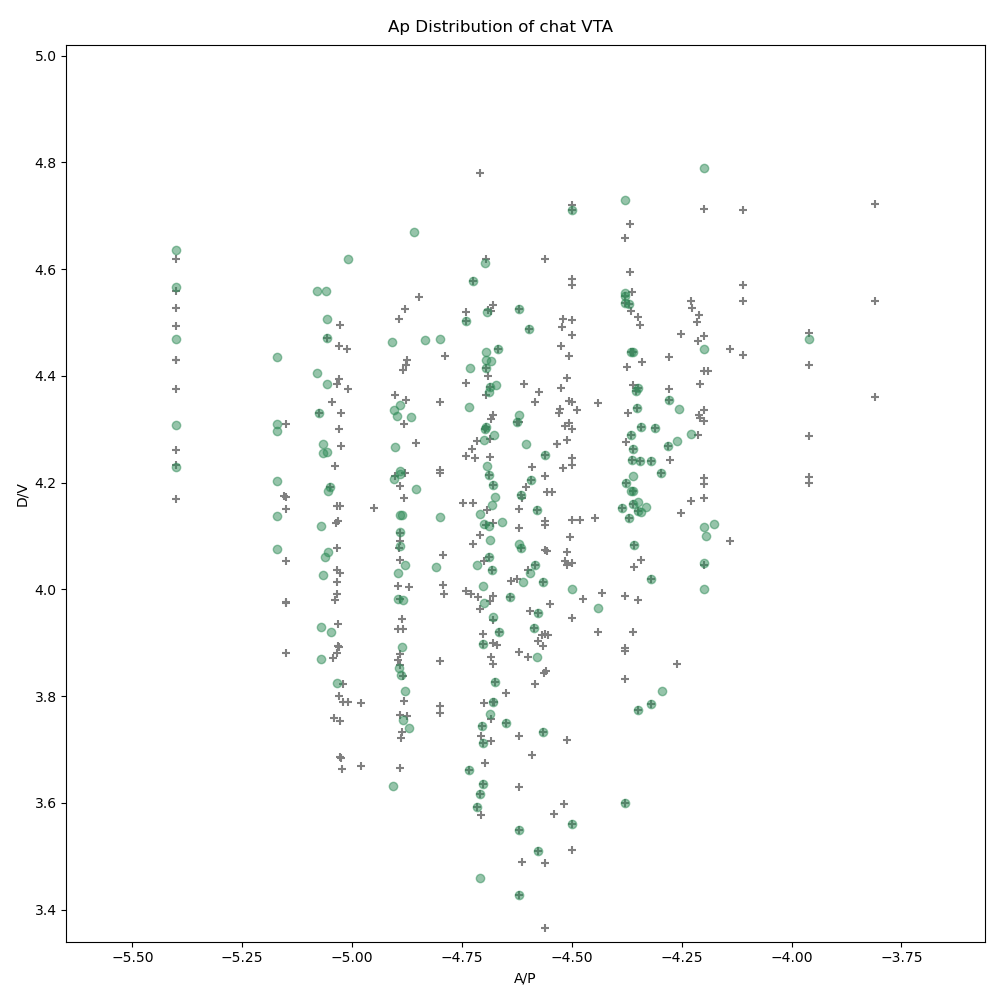

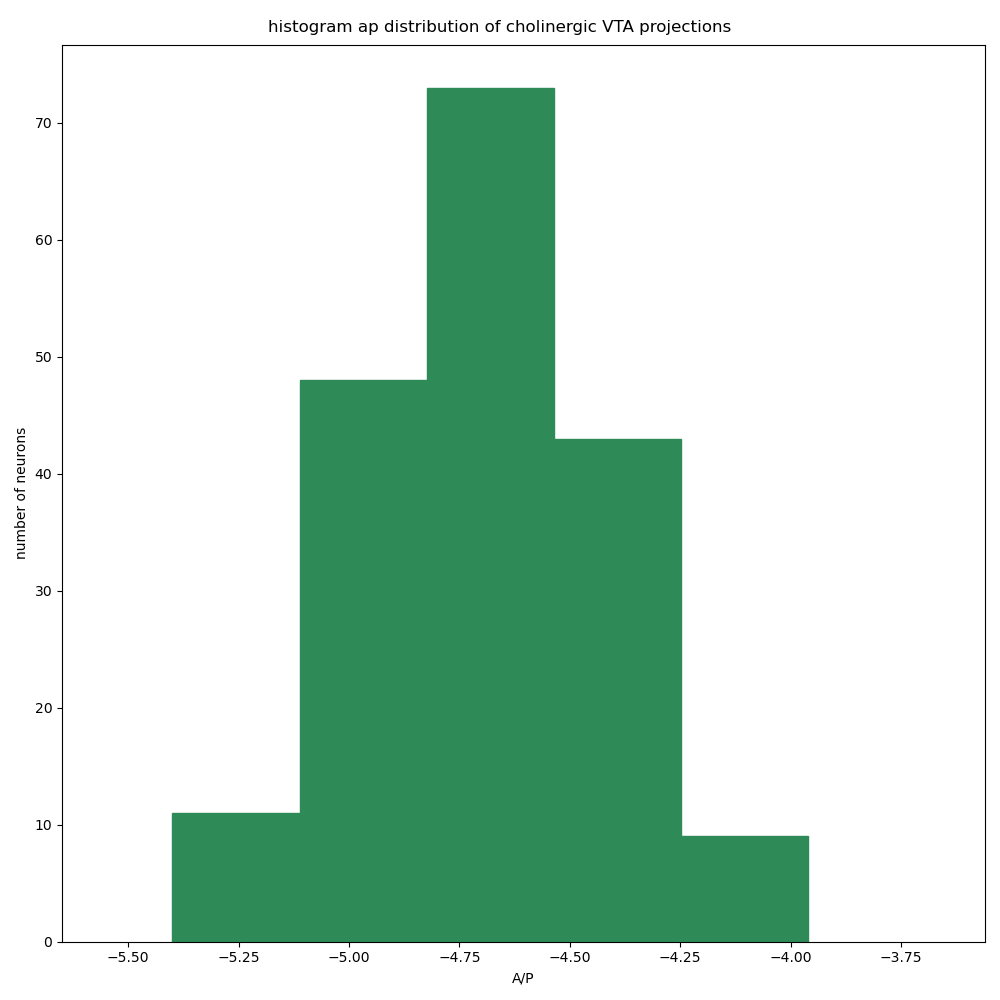

In [10]:
#create figure- specifics
FigureTitle= 'Ap Distribution of chat VTA'
FigureDetail= 'ap scatter of chat rVTA '
fig_2Dap, ax_ap= plt.subplots()
fig_2Dap.suptitle(FigureTitle)
#Create plot axis details 
ax_ap.set_xlim (ap_kmmin-0.25, ap_kmmax+0.25)
ax_ap.set_xlabel('A/P')
ax_ap.set_ylim(min_kmy, max_kmy)
ax_ap.set_ylabel('D/V')

#pull out only left values - make variables for plot
color_input_km='0.5'
alpha_input_km= 1
marker_input_km='+'
for spring in range (0, len(data_model)):
    ml_check= data_model['ml'][spring]
    if ml_check <= 0:
        ml_value= data_model['ml'][spring] 
        ap_value= data_model['ap'][spring]
        dv_value= data_model['dv'][spring]
        ax_ap.scatter(ap_value, dv_value, c=color_input_km, alpha= alpha_input_km, marker=marker_input_km)
    else:
        pass

#Plot for only left hemisphere
alpha_forplot= 0.5
color_value= 'seagreen'
marker_set= 'o'
for summer in range (0, len(ap_POI)):
    ml_check= ml_POI[summer]
    ap_value= ap_POI[summer]
    dv_value= dv_POI[summer]
    #treat_value= data_POI['treatment'][summer]
    #color_forplot= colorcode_forplot[summer]
    ax_ap.scatter(ap_value, dv_value, c=color_value, alpha= alpha_forplot, marker=marker_set)
    
save_results_to = my_path + output_figures
print("Location of saved file:", save_results_to)
print("file saved", FigureTitle)
plt.savefig(save_results_to +  "_ Figure_" + FigureDetail + file_date_name + '.pdf', dpi = 600)
plt.savefig(save_results_to + "_ Figure_" + FigureDetail+ file_date_name + '.png', dpi = 600)

#######################################################################################################################################################################   
#Make a histogram instead 
FigureTitle= 'histogram ap distribution of cholinergic VTA projections'
FigureDetail= 'histogram of chatVTA ap range'
fig_histap, ax_histap= plt.subplots()
fig_histap.suptitle(FigureTitle)
#Create plot axis details 
ax_histap.set_xlim (ap_kmmin-0.25, ap_kmmax+0.25)
ax_histap.set_xlabel('A/P')
#ax_histap.set_ylim(min_kmy, max_kmy)
ax_histap.set_ylabel('number of neurons')

#make a histogram 
bar_pattern='///'
dataset_forplot= data_POI
bin_number=5

#create a color code based on specific group numbers, and variables for graphing based on group numbers 
ax_histap.hist(dataset_forplot['ap'], bins=bin_number, color=color_value, histtype='step', fill= True)

save_results_to = my_path + output_figures
print("Location of saved file:", save_results_to)
print("file saved", FigureTitle)
plt.savefig(save_results_to + "_ Figure_" + FigureDetail + file_date_name + '.pdf', dpi = 600)
plt.savefig(save_results_to +  "_ Figure_" + FigureDetail+ file_date_name + '.png', dpi = 600)



### All POI: Create figure histogram for treatment distribution along ml and dv axis for all cross-sections
*NOTE* this section is currently hard-coded for a subplot 4 cross sections
- needs to be updated with an iterable for-loop at a later date to allow for more versitility

In [ ]:
#Makea  histogram of each cross section subplot
#All section variables:
bin_number= 5
color_allhist= '0.75'
alpha_value= 0.5
bar_pattern= '///'

###############################################################################################################################
#create a histogram for each cross section- SECTION 1
FigureTitle= "rVTA histogram in cross section 1"
FigureDetail= 'rVTA histogram 1'
fig_hist1, ax_hist1= plt.subplots(4, sharey='all')
fig_hist1.suptitle(FigureTitle)
#First, generate each plot for one cross section 
topleft1=ax_hist1[0]
topleft1.set_xlim(-2, 0)
topleft1.set_title("ML distribution, left")
topleft1.set_ylabel('number of neurons')
sideleft1=ax_hist1[1]
sideleft1.set_xlim(3,5)
sideleft1.set_title("DV distribution, left")
sideleft1.set_ylabel('number of neurons')
topright1= ax_hist1[2]
topright1.set_xlim(0,2)
topright1.set_title("ML distribution, right")
topright1.set_ylabel('number of neurons')
sideright1=ax_hist1[3]
sideright1.set_xlim(3, 5)
sideright1.set_title("DV distribution, right")
sideright1.set_ylabel('number of neurons')

#Histogram of left hemisphere, cross section 1 
topleft1.hist(POI_sct1L['ml'],bin_number, color=color_value, histtype='step', fill= True, alpha=alpha_value)
sideleft1.hist(POI_sct1L['dv'], bin_number, color=color_value, histtype='step', fill= True, alpha=alpha_value)
#grlist_P1L=POI_sct1L.groupby('groups')['groups'].unique().tolist()

#create histogram based on group/treatment number and color
#input_forloop= grlist_P1L
dataset_forplot= POI_sct1L
plot_mlonfigure= topleft1
plot_dvonfigure= sideleft1

plot_mlonfigure.hist(dataset_forplot['ml'], bin_number, color=color_value, histtype='step', fill= True)
plot_dvonfigure.hist(dataset_forplot['dv'], bin_number, color=color_value, histtype='step', fill= True)

#Histogram: right hemisphere, cross section 1        
topright1.hist(POI_sct1R['ml'], bin_number, color=color_value , histtype='step', fill= True, alpha=alpha_value)
sideright1.hist(POI_sct1R['dv'], bin_number, color=color_value, histtype='step', fill= True, alpha=alpha_value)
#grlist_P1R=POI_sct1R.groupby('groups')['groups'].unique().tolist()
#create a color code based on specific group numbers, and variables for graphing based on group numbers 

dataset_forplot= POI_sct1R
plot_mlonfigure= topright1
plot_dvonfigure= sideright1

            
plot_mlonfigure.hist(dataset_forplot['ml'], bin_number, color=color_value, histtype='step', fill= True)
plot_dvonfigure.hist(dataset_forplot['dv'],bin_number, color=color_value, histtype='step', fill= True)


#Save Figure
save_results_to = my_path + output_figures
print("Location of saved file:", save_results_to)
print("file saved", FigureTitle)
plt.savefig(save_results_to +"_ Figure_" + FigureDetail + file_date_name + '.pdf', dpi = 600)
plt.savefig(save_results_to + "_ Figure_" + FigureDetail + file_date_name + '.png', dpi = 600)

######################################################################################################################################################

#create a histogram for each cross section- SECTION 1
FigureTitle= "rVTA histogram in cross section 2"
FigureDetail= 'rVTA histogram 2'
fig_hist2, ax_hist2= plt.subplots(4, sharey='all')
fig_hist2.suptitle(FigureTitle)
#First, generate each plot for one cross section 
topleft2=ax_hist2[0]
topleft2.set_xlim(-2, 0)
topleft2.set_title("ML distribution, left")
topleft2.set_ylabel('number of neurons')
sideleft2=ax_hist2[1]
sideleft2.set_xlim(3,5)
sideleft2.set_title("DV distribution, left")
sideleft2.set_ylabel('number of neurons')
topright2= ax_hist2[2]
topright2.set_xlim(0,2)
topright2.set_title("ML distribution, right")
topright2.set_ylabel('number of neurons')
sideright2=ax_hist2[3]
sideright2.set_xlim(3, 5)
sideright2.set_title("DV distribution, right")
sideright2.set_ylabel('number of neurons')

#Histogram of left hemisphere, cross section 1 
topleft2.hist(POI_sct1L['ml'],bin_number, color=color_value, histtype='step', fill= True, alpha=alpha_value)
sideleft2.hist(POI_sct1L['dv'], bin_number, color=color_value, histtype='step', fill= True, alpha=alpha_value)
#grlist_P1L=POI_sct1L.groupby('groups')['groups'].unique().tolist()

#create histogram based on group/treatment number and color
#input_forloop= grlist_P1L
dataset_forplot= POI_sct2L
plot_mlonfigure= topleft2
plot_dvonfigure= sideleft2

plot_mlonfigure.hist(dataset_forplot['ml'], bin_number, color=color_value, histtype='step', fill= True)
plot_dvonfigure.hist(dataset_forplot['dv'], bin_number, color=color_value, histtype='step', fill= True)

#Histogram: right hemisphere, cross section 1        
topright2.hist(POI_sct2R['ml'], bin_number, color=color_value , histtype='step', fill= True, alpha=alpha_value)
sideright2.hist(POI_sct2R['dv'], bin_number, color=color_value, histtype='step', fill= True, alpha=alpha_value)
#grlist_P1R=POI_sct1R.groupby('groups')['groups'].unique().tolist()
#create a color code based on specific group numbers, and variables for graphing based on group numbers 

dataset_forplot= POI_sct2R
plot_mlonfigure= topright2
plot_dvonfigure= sideright2

            
plot_mlonfigure.hist(dataset_forplot['ml'], bin_number, color=color_value, histtype='step', fill= True)
plot_dvonfigure.hist(dataset_forplot['dv'],bin_number, color=color_value, histtype='step', fill= True)


#Save Figure
save_results_to = my_path + output_figures
print("Location of saved file:", save_results_to)
print("file saved", FigureTitle)
plt.savefig(save_results_to +"_ Figure_" + FigureDetail + file_date_name + '.pdf', dpi = 600)
plt.savefig(save_results_to + "_ Figure_" + FigureDetail + file_date_name + '.png', dpi = 600)

##############################################################################################################################################################
#histogram: cross section 3
#create a histogram for each cross section- SECTION 3
FigureTitle= "rVTA histogram in cross section 3"
FigureDetail= 'rVTA histogram 3'
fig_hist3, ax_hist3= plt.subplots(4, sharey='all')
fig_hist3.suptitle(FigureTitle)
#First, generate each plot for one cross section 
topleft3=ax_hist3[0]
topleft3.set_xlim(-2, 0)
topleft3.set_title("ML distribution, left")
topleft3.set_ylabel('number of neurons')
sideleft3=ax_hist3[1]
sideleft3.set_xlim(3,5)
sideleft3.set_title("DV distribution, left")
sideleft3.set_ylabel('number of neurons')
topright3= ax_hist3[2]
topright3.set_xlim(0,2)
topright3.set_title("ML distribution, right")
topright3.set_ylabel('number of neurons')
sideright3=ax_hist3[3]
sideright3.set_xlim(3, 5)
sideright3.set_title("DV distribution, right")
sideright3.set_ylabel('number of neurons')

#Histogram of left hemisphere, cross section 1 
topleft3.hist(POI_sct3L['ml'],bin_number, color=color_value, histtype='step', fill= True, alpha=alpha_value)
sideleft3.hist(POI_sct3L['dv'], bin_number, color=color_value, histtype='step', fill= True, alpha=alpha_value)
#grlist_P1L=POI_sct1L.groupby('groups')['groups'].unique().tolist()

#create histogram based on group/treatment number and color
#input_forloop= grlist_P1L
dataset_forplot= POI_sct3L
plot_mlonfigure= topleft3
plot_dvonfigure= sideleft3

plot_mlonfigure.hist(dataset_forplot['ml'], bin_number, color=color_value, histtype='step', fill= True)
plot_dvonfigure.hist(dataset_forplot['dv'], bin_number, color=color_value, histtype='step', fill= True)

#Histogram: right hemisphere, cross section 1        
topright3.hist(POI_sct3R['ml'], bin_number, color=color_value , histtype='step', fill= True, alpha=alpha_value)
sideright3.hist(POI_sct3R['dv'], bin_number, color=color_value, histtype='step', fill= True, alpha=alpha_value)
#grlist_P1R=POI_sct1R.groupby('groups')['groups'].unique().tolist()
#create a color code based on specific group numbers, and variables for graphing based on group numbers 

dataset_forplot= POI_sct3R
plot_mlonfigure= topright3
plot_dvonfigure= sideright3

            
plot_mlonfigure.hist(dataset_forplot['ml'], bin_number, color=color_value, histtype='step', fill= True)
plot_dvonfigure.hist(dataset_forplot['dv'],bin_number, color=color_value, histtype='step', fill= True)


#Save Figure
save_results_to = my_path + output_figures
print("Location of saved file:", save_results_to)
print("file saved", FigureTitle)
plt.savefig(save_results_to +"_ Figure_" + FigureDetail + file_date_name + '.pdf', dpi = 600)
plt.savefig(save_results_to + "_ Figure_" + FigureDetail + file_date_name + '.png', dpi = 600)


#####################################################################################################################################################################
#create a histogram for each cross section- SECTION 4
FigureTitle= "rVTA histogram in cross section 4"
FigureDetail= 'rVTA histogram 4'
fig_hist4, ax_hist4= plt.subplots(4, sharey='all')
fig_hist4.suptitle(FigureTitle)
#First, generate each plot for one cross section 
topleft4=ax_hist4[0]
topleft4.set_xlim(-2, 0)
topleft4.set_title("ML distribution, left")
topleft4.set_ylabel('number of neurons')
sideleft4=ax_hist4[1]
sideleft4.set_xlim(3,5)
sideleft4.set_title("DV distribution, left")
sideleft4.set_ylabel('number of neurons')
topright4= ax_hist4[2]
topright4.set_xlim(0,2)
topright4.set_title("ML distribution, right")
topright4.set_ylabel('number of neurons')
sideright4=ax_hist4[3]
sideright4.set_xlim(3, 5)
sideright4.set_title("DV distribution, right")
sideright4.set_ylabel('number of neurons')

#Histogram of left hemisphere, cross section 1 
#topleft4.hist(POI_sct4L['ml'],bin_number, color=color_value, histtype='step', fill= True, alpha=alpha_value)
#sideleft4.hist(POI_sct4L['dv'], bin_number, color=color_value, histtype='step', fill= True, alpha=alpha_value)
#grlist_P1L=POI_sct1L.groupby('groups')['groups'].unique().tolist()

#create histogram based on group/treatment number and color
#input_forloop= grlist_P1L
#dataset_forplot= POI_sct4L
plot_mlonfigure= topleft4
plot_dvonfigure= sideleft4

#plot_mlonfigure.hist(dataset_forplot['ml'], bin_number, color=color_value, histtype='step', fill= True)
#plot_dvonfigure.hist(dataset_forplot['dv'], bin_number, color=color_value, histtype='step', fill= True)

#Histogram: right hemisphere, cross section 1        
topright4.hist(POI_sct4R['ml'], bin_number, color=color_value , histtype='step', fill= True, alpha=alpha_value)
sideright4.hist(POI_sct4R['dv'], bin_number, color=color_value, histtype='step', fill= True, alpha=alpha_value)
#grlist_P1R=POI_sct1R.groupby('groups')['groups'].unique().tolist()
#create a color code based on specific group numbers, and variables for graphing based on group numbers 

dataset_forplot= POI_sct4R
plot_mlonfigure= topright4
plot_dvonfigure= sideright4

            
plot_mlonfigure.hist(dataset_forplot['ml'], bin_number, color=color_value, histtype='step', fill= True)
plot_dvonfigure.hist(dataset_forplot['dv'],bin_number, color=color_value, histtype='step', fill= True)


#Save Figure
save_results_to = my_path + output_figures
print("Location of saved file:", save_results_to)
print("file saved", FigureTitle)
plt.savefig(save_results_to +"_ Figure_" + FigureDetail + file_date_name + '.pdf', dpi = 600)
plt.savefig(save_results_to + "_ Figure_" + FigureDetail + file_date_name + '.png', dpi = 600)


### All POI: Visual 2: boxplox to show distribtuion of data across treatments
- for each cross section: vertical violin to represent dv ("sides" averaged), and horizontal to represent ml ("top" averaged)

In [ ]:
#Makea  histogram of each cross section subplot
#All section variables:


#set formating for boxplot figure styles
linewidth_set= 2
box_width= 0.5
notch_choice= False
symbol_set= 'x'
flier_props= dict(marker='o')
median_props= dict(linewidth=linewidth_set, color='white')
mean_line= True
meanpoint_props= dict(marker='o', markersize=8, markerfacecolor='white', markeredgecolor='k',)
meanline_props= dict(linestyle='--', linewidth=linewidth_set, color='k')
whisker_props= dict(linewidth=linewidth_set)
cap_props=dict(linewidth=linewidth_set)

#create a histogram for each cross section- SECTION 1
#First, generate each plot for one cross section 
#Essentially only 2: a ml and a dv for each cross section 

    
###############################################################################################################################
FigureTitle= "rVTA boxplot in cross section 1"
FigureDetail= 'rVTA boxplot 1'
fig_vio1, ax_vio1= plt.subplots(2)
fig_vio1.suptitle(FigureTitle)

ml_violin1= ax_vio1[0] #horizontal bars
ml_violin1.set_title('M/L distribution')
ml_violin1.set_ylabel('M/L')
ml_violin1.set_ylim(0, 2)

dv_violin1= ax_vio1[1] #vetical bars
dv_violin1.set_title('D/V distribution')
dv_violin1.set_ylabel('D/V')



#create histogram based on group/treatment number and color

plot_mlonfigure= ml_violin1
dataset_forplot= POI_sct1
plot_mlonfigure.boxplot(abs(dataset_forplot['ml']),
                                    notch= notch_choice, vert=True, showfliers=True, sym=symbol_set, patch_artist=True,
                                    widths=box_width, boxprops= dict(facecolor=color_value, linewidth=linewidth_set), 
                                    medianprops= median_props, showmeans=True, meanline=False, meanprops= meanpoint_props, 
                                    whis=1.5, whiskerprops=whisker_props, capprops=cap_props, 
                                    autorange=True, manage_ticks=True)
     
plot_dvonfigure= dv_violin1
dataset_forplot= POI_sct1
plot_dvonfigure.boxplot(abs(dataset_forplot['dv']), 
                                    notch= notch_choice, vert=True, showfliers=True, sym=symbol_set, patch_artist=True,
                                    widths=box_width, boxprops= dict(facecolor=color_value, linewidth=linewidth_set), 
                                    medianprops= median_props, showmeans=True, meanline=False, meanprops= meanpoint_props, 
                                    whis=1.5, whiskerprops=whisker_props, capprops=cap_props, 
                                    autorange=True, manage_ticks=True)

plt.show()

#Save Figure File to path folder
save_results_to = my_path + output_figures
print("Location of saved file:", save_results_to)
print("file saved", FigureTitle)
plt.savefig(save_results_to + "_ Figure_" + FigureDetail + file_date_name + '.pdf', dpi = 600)
plt.savefig(save_results_to + "_ Figure_" + FigureDetail + file_date_name + '.png', dpi = 600)


###############################################################################################################################
FigureTitle= "rVTA boxplot in cross section 2"
FigureDetail= 'rVTA boxplot 2'
fig_vio2, ax_vio2= plt.subplots(2)
fig_vio2.suptitle(FigureTitle)

ml_violin2= ax_vio2[0] #horizontal bars
ml_violin2.set_title('M/L distribution')
ml_violin2.set_ylabel('M/L')
ml_violin2.set_ylim(0, 2)

dv_violin2= ax_vio2[1] #vetical bars
dv_violin2.set_title('D/V distribution')
dv_violin2.set_ylabel('D/V')



#create histogram based on group/treatment number and color

plot_mlonfigure= ml_violin2
dataset_forplot= POI_sct2
plot_mlonfigure.boxplot(abs(dataset_forplot['ml']),
                                    notch= notch_choice, vert=True, showfliers=True, sym=symbol_set, patch_artist=True,
                                    widths=box_width, boxprops= dict(facecolor=color_value, linewidth=linewidth_set), 
                                    medianprops= median_props, showmeans=True, meanline=False, meanprops= meanpoint_props, 
                                    whis=1.5, whiskerprops=whisker_props, capprops=cap_props, 
                                    autorange=True, manage_ticks=True)
        
plot_dvonfigure= dv_violin2
plot_dvonfigure.boxplot(abs(dataset_forplot['dv']), 
                                    notch= notch_choice, vert=True, showfliers=True, sym=symbol_set, patch_artist=True,
                                    widths=box_width, boxprops= dict(facecolor=color_value, linewidth=linewidth_set), 
                                    medianprops= median_props, showmeans=True, meanline=False, meanprops= meanpoint_props, 
                                    whis=1.5, whiskerprops=whisker_props, capprops=cap_props, 
                                    autorange=True, manage_ticks=True)
 
plt.show()   

#Save Figure File to path folder
save_results_to = my_path + output_figures
print("Location of saved file:", save_results_to)
print("file saved", FigureTitle)
plt.savefig(save_results_to + "_ Figure_" + FigureDetail + file_date_name + '.pdf', dpi = 600)
plt.savefig(save_results_to + "_ Figure_" + FigureDetail + file_date_name + '.png', dpi = 600)

###############################################################################################################################
FigureTitle= "rVTA boxplot in cross section 3"
FigureDetail= 'rVTA boxplot 3'
fig_vio3, ax_vio3= plt.subplots(2)
fig_vio3.suptitle(FigureTitle)

ml_violin3= ax_vio3[0] #horizontal bars
ml_violin3.set_title('M/L distribution')
ml_violin3.set_ylabel('M/L')
ml_violin3.set_ylim(0, 2)

dv_violin3= ax_vio3[1] #vetical bars
dv_violin3.set_title('D/V distribution')
dv_violin3.set_ylabel('D/V')



#create histogram based on group/treatment number and color

plot_mlonfigure= ml_violin3
dataset_forplot= POI_sct3
plot_mlonfigure.boxplot(abs(dataset_forplot['ml']),
                                    notch= notch_choice, vert=True, showfliers=True, sym=symbol_set, patch_artist=True,
                                    widths=box_width, boxprops= dict(facecolor=color_value, linewidth=linewidth_set), 
                                    medianprops= median_props, showmeans=True, meanline=False, meanprops= meanpoint_props, 
                                    whis=1.5, whiskerprops=whisker_props, capprops=cap_props, 
                                    autorange=True, manage_ticks=True)
        
plot_dvonfigure= dv_violin3
plot_dvonfigure.boxplot(abs(dataset_forplot['dv']), 
                                    notch= notch_choice, vert=True, showfliers=True, sym=symbol_set, patch_artist=True,
                                    widths=box_width, boxprops= dict(facecolor=color_value, linewidth=linewidth_set), 
                                    medianprops= median_props, showmeans=True, meanline=False, meanprops= meanpoint_props, 
                                    whis=1.5, whiskerprops=whisker_props, capprops=cap_props, 
                                    autorange=True, manage_ticks=True)

plt.show()

#Save Figure File to path folder
save_results_to = my_path + output_figures
print("Location of saved file:", save_results_to)
print("file saved", FigureTitle)
plt.savefig(save_results_to + "_ Figure_" + FigureDetail + file_date_name + '.pdf', dpi = 600)
plt.savefig(save_results_to + "_ Figure_" + FigureDetail + file_date_name + '.png', dpi = 600)

       
###############################################################################################################################
FigureTitle= "rVTA boxplot in cross section 4"
FigureDetail= 'rVTA boxplot 4'
fig_vio4, ax_vio4= plt.subplots(2)
fig_vio4.suptitle(FigureTitle)

ml_violin4= ax_vio4[0] #horizontal bars
ml_violin4.set_title('M/L distribution')
ml_violin4.set_ylabel('M/L')
ml_violin4.set_ylim(0, 2)

dv_violin4= ax_vio4[1] #vetical bars
dv_violin4.set_title('D/V distribution')
dv_violin4.set_ylabel('D/V')



#create histogram based on group/treatment number and color

plot_mlonfigure= ml_violin4
dataset_forplot= POI_sct4
plot_mlonfigure.boxplot(abs(dataset_forplot['ml']),
                                    notch= notch_choice, vert=True, showfliers=True, sym=symbol_set, patch_artist=True,
                                    widths=box_width, boxprops= dict(facecolor=color_value, linewidth=linewidth_set), 
                                    medianprops= median_props, showmeans=True, meanline=False, meanprops= meanpoint_props, 
                                    whis=1.5, whiskerprops=whisker_props, capprops=cap_props, 
                                    autorange=True, manage_ticks=True)
        
plot_dvonfigure= dv_violin4
plot_dvonfigure.boxplot(abs(dataset_forplot['dv']), 
                                    notch= notch_choice, vert=True, showfliers=True, sym=symbol_set, patch_artist=True,
                                    widths=box_width, boxprops= dict(facecolor=color_value, linewidth=linewidth_set), 
                                    medianprops= median_props, showmeans=True, meanline=False, meanprops= meanpoint_props, 
                                    whis=1.5, whiskerprops=whisker_props, capprops=cap_props, 
                                    autorange=True, manage_ticks=True)

plt.show()

#Save Figure File to path folder
save_results_to = my_path + output_figures
print("Location of saved file:", save_results_to)
print("file saved", FigureTitle)
plt.savefig(save_results_to + "_ Figure_" + FigureDetail + file_date_name + '.pdf', dpi = 600)
plt.savefig(save_results_to + "_ Figure_" + FigureDetail + file_date_name + '.png', dpi = 600)


###################################################################################################################################################
        
#create figure- specifics
FigureTitle= 'Boxplot Ap rVTA'
FigureDetail= 'rVTA boxplot AP'
fig_boxap, ax_boxap= plt.subplots()
fig_boxap.suptitle(FigureTitle)
#Create plot axis details 
ax_boxap.set_title('A/P distribution')
ax_boxap.set_ylabel('A/P')


#set formating for boxplot figure styles
linewidth_set= 2
box_width= 0.5
notch_choice= False
symbol_set= 'x'
flier_props= dict(marker='o')
median_props= dict(linewidth=linewidth_set, color='white')
mean_line= True
meanpoint_props= dict(marker='o', markersize=8, markerfacecolor='white', markeredgecolor='k',)
meanline_props= dict(linestyle='--', linewidth=linewidth_set, color='k')
whisker_props= dict(linewidth=linewidth_set)
cap_props=dict(linewidth=linewidth_set)

dataset_forplot= data_POI
ax_boxap.boxplot(dataset_forplot['ap'], 
                                    notch= notch_choice, vert=True, showfliers=True, sym=symbol_set, patch_artist=True,
                                    widths=box_width, boxprops= dict(facecolor=color_value, linewidth=linewidth_set), 
                                    medianprops= median_props, showmeans=True, meanline=False, meanprops= meanpoint_props, 
                                    whis=1.5, whiskerprops=whisker_props, capprops=cap_props, 
                                    autorange=True, manage_ticks=True)

plt.show()

save_results_to = my_path + output_figures
print("Location of saved file:", save_results_to)
print("file saved", FigureTitle)
plt.savefig(save_results_to + "_ Figure_" + FigureDetail + file_date_name + '.pdf', dpi = 600)
plt.savefig(save_results_to + "_ Figure_" + FigureDetail + file_date_name + '.png', dpi = 600)



In [ ]:
FigureTitle= 'rep brain boxmodel sct1'
FigureDetail= 'All rep model ach boxplot in section 1'
#boxplot- m/l and d/v histogram for representative brain 
repbrain_boxcolor= '0.5'

fig_boxall1, ax_ba1= plt.subplots(2)
FigureDetails= 'All rep model ach boxplot in section 1'
fig_boxall1.suptitle(FigureTitle)

dataset_forplot=km_sct1

ml_repbrain1= ax_ba1[0]
pl_ml= ml_repbrain1
ml_repbrain1.set_title('M/L distribution')
ml_repbrain1.set_ylabel('M/L')
ml_repbrain1.set_ylim(0, max_kmx)

dv_repbrain1=ax_ba1[1]
pl_dv= dv_repbrain1
dv_repbrain1.set_title('D/V distribution')
dv_repbrain1.set_ylabel('D/V')

#__
pl_dv.boxplot(abs(dataset_forplot['dv']), 
                                    notch= notch_choice, vert=True, showfliers=True, sym=symbol_set, patch_artist=True,
                                    widths=box_width, boxprops= dict(facecolor=repbrain_boxcolor, linewidth=linewidth_set), 
                                    medianprops= median_props, showmeans=True, meanline=False, meanprops= meanpoint_props, 
                                    whis=1.5, whiskerprops=whisker_props, capprops=cap_props, 
                                    autorange=True, manage_ticks=True,)
pl_ml.boxplot(abs(dataset_forplot['ml']), 
                                    notch= notch_choice, vert=True, showfliers=True, sym=symbol_set, patch_artist=True,
                                    widths=box_width, boxprops= dict(facecolor=repbrain_boxcolor, linewidth=linewidth_set), 
                                    medianprops= median_props, showmeans=True, meanline=False, meanprops= meanpoint_props, 
                                    whis=1.5, whiskerprops=whisker_props, capprops=cap_props, 
                                    autorange=True, manage_ticks=True,)
plt.show()
save_results_to = my_path + output_figures
print("Location of saved file:", save_results_to)
print("file saved", FigureTitle)
plt.savefig(save_results_to +"_ Figure_" + FigureDetail + file_date_name + '.pdf', dpi = 600)
plt.savefig(save_results_to +  "_ Figure_" + FigureDetail + file_date_name + '.png', dpi = 600)


######################
FigureTitle= 'rep brain boxmodel sct2'
FigureDetail= 'All rep model ach boxplot in section 2'
repbrain_boxcolor= '0.5'

fig_boxall2, ax_ba2= plt.subplots(2)
fig_boxall2.suptitle(FigureTitle)

dataset_forplot=km_sct2

ml_repbrain2= ax_ba2[0]
pl_ml= ml_repbrain2
ml_repbrain2.set_title('M/L distribution')
ml_repbrain2.set_ylabel('M/L')
ml_repbrain2.set_ylim(0, max_kmx)

dv_repbrain2=ax_ba2[1]
pl_dv= dv_repbrain2
dv_repbrain2.set_title('D/V distribution')
dv_repbrain2.set_ylabel('D/V')

#__
pl_dv.boxplot(abs(dataset_forplot['dv']), 
                                    notch= notch_choice, vert=True, showfliers=True, sym=symbol_set, patch_artist=True,
                                    widths=box_width, boxprops= dict(facecolor=repbrain_boxcolor, linewidth=linewidth_set), 
                                    medianprops= median_props, showmeans=True, meanline=False, meanprops= meanpoint_props, 
                                    whis=1.5, whiskerprops=whisker_props, capprops=cap_props, 
                                    autorange=True, manage_ticks=True,)
pl_ml.boxplot(abs(dataset_forplot['ml']), 
                                    notch= notch_choice, vert=True, showfliers=True, sym=symbol_set, patch_artist=True,
                                    widths=box_width, boxprops= dict(facecolor=repbrain_boxcolor, linewidth=linewidth_set), 
                                    medianprops= median_props, showmeans=True, meanline=False, meanprops= meanpoint_props, 
                                    whis=1.5, whiskerprops=whisker_props, capprops=cap_props, 
                                    autorange=True, manage_ticks=True,)

plt.show()
save_results_to = my_path + output_figures
print("Location of saved file:", save_results_to)
print("file saved", FigureTitle)
plt.savefig(save_results_to +"_ Figure_" + FigureDetail + file_date_name + '.pdf', dpi = 600)
plt.savefig(save_results_to +  "_ Figure_" + FigureDetail + file_date_name + '.png', dpi = 600)


#####################################
FigureTitle= 'rep brain boxmodel sct3'
FigureDetail= 'All rep model ach boxplot in section 3'
repbrain_boxcolor= '0.5'

fig_boxall3, ax_ba3= plt.subplots(2)
fig_boxall3.suptitle(FigureTitle)

dataset_forplot=km_sct3

ml_repbrain3= ax_ba3[0]
pl_ml= ml_repbrain3
ml_repbrain3.set_title('M/L distribution')
ml_repbrain3.set_ylabel('M/L')
ml_repbrain3.set_ylim(0, max_kmx)

dv_repbrain3=ax_ba3[1]
pl_dv= dv_repbrain3
dv_repbrain3.set_title('D/V distribution')
dv_repbrain3.set_ylabel('D/V')

#__
pl_dv.boxplot(abs(dataset_forplot['dv']), 
                                    notch= notch_choice, vert=True, showfliers=True, sym=symbol_set, patch_artist=True,
                                    widths=box_width, boxprops= dict(facecolor=repbrain_boxcolor, linewidth=linewidth_set), 
                                    medianprops= median_props, showmeans=True, meanline=False, meanprops= meanpoint_props, 
                                    whis=1.5, whiskerprops=whisker_props, capprops=cap_props, 
                                    autorange=True, manage_ticks=True,)
pl_ml.boxplot(abs(dataset_forplot['ml']), 
                                    notch= notch_choice, vert=True, showfliers=True, sym=symbol_set, patch_artist=True,
                                    widths=box_width, boxprops= dict(facecolor=repbrain_boxcolor, linewidth=linewidth_set), 
                                    medianprops= median_props, showmeans=True, meanline=False, meanprops= meanpoint_props, 
                                    whis=1.5, whiskerprops=whisker_props, capprops=cap_props, autorange=True, manage_ticks=True,)

plt.show()
save_results_to = my_path + output_figures
print("Location of saved file:", save_results_to)
print("file saved", FigureTitle)
plt.savefig(save_results_to +"_ Figure_" + FigureDetail + file_date_name + '.pdf', dpi = 600)
plt.savefig(save_results_to +  "_ Figure_" + FigureDetail + file_date_name + '.png', dpi = 600)


################
FigureTitle= 'rep brain boxmodel sct4'
FigureDetail= 'All rep model ach boxplot in section 4'
repbrain_boxcolor= '0.5'

fig_boxall4, ax_ba4= plt.subplots(2)
fig_boxall4.suptitle(FigureTitle)

dataset_forplot=km_sct4

ml_repbrain4= ax_ba4[0]
pl_ml= ml_repbrain4
ml_repbrain4.set_title('M/L distribution')
ml_repbrain4.set_ylabel('M/L')
ml_repbrain4.set_ylim(0, max_kmx)

dv_repbrain4=ax_ba4[1]
pl_dv= dv_repbrain4
dv_repbrain4.set_title('D/V distribution')
dv_repbrain4.set_ylabel('D/V')

#__
pl_dv.boxplot(abs(dataset_forplot['dv']), 
                                    notch= notch_choice, vert=True, showfliers=True, sym=symbol_set, patch_artist=True,
                                    widths=box_width, boxprops= dict(facecolor=repbrain_boxcolor, linewidth=linewidth_set), 
                                    medianprops= median_props, showmeans=True, meanline=False, meanprops= meanpoint_props, 
                                    whis=1.5, whiskerprops=whisker_props, capprops=cap_props, 
                                    autorange=True, manage_ticks=True,)
pl_ml.boxplot(abs(dataset_forplot['ml']), 
                                    notch= notch_choice, vert=True, showfliers=True, sym=symbol_set, patch_artist=True,
                                    widths=box_width, boxprops= dict(facecolor=repbrain_boxcolor, linewidth=linewidth_set), 
                                    medianprops= median_props, showmeans=True, meanline=False, meanprops= meanpoint_props, 
                                    whis=1.5, whiskerprops=whisker_props, capprops=cap_props, 
                                    autorange=True, manage_ticks=True,)
plt.show()
save_results_to = my_path + output_figures
print("Location of saved file:", save_results_to)
print("file saved", FigureTitle)
plt.savefig(save_results_to +"_ Figure_" + FigureDetail + file_date_name + '.pdf', dpi = 600)
plt.savefig(save_results_to +  "_ Figure_" + FigureDetail + file_date_name + '.png', dpi = 600)


*____________________________________________________________________________________________________________________________________________________*